Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 215s 534ms/step - accuracy: 0.7156 - loss: 0.5251 - val_accuracy: 0.8673 - val_loss: 0.3320
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 188s 481ms/step - accuracy: 0.9136 - loss: 0.2282 - val_accuracy: 0.8668 - val_loss: 0.3127
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 138s 352ms/step - accuracy: 0.9471 - loss: 0.1501 - val_accuracy: 0.8646 - val_loss: 0.4184
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 161s 412ms/step - accuracy: 0.9528 - loss: 0.1259 - val_accuracy: 0.8602 - val_loss: 0.4303
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 515ms/step - accuracy: 0.9744 - loss: 0.0758 - val_accuracy: 0.8565 - val_loss: 0.4715

Test Accuracy: 0.8565


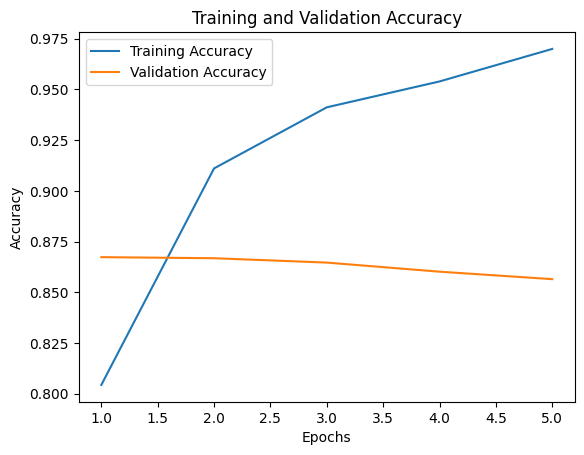

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

# Load the IMDb dataset
vocab_size = 10000  # Only use the top 10,000 words
maxlen = 200  # Limit each review to 200 words

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure each review is of the same length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Build the Bi-directional LSTM model
def build_bilstm_model():
    model = models.Sequential([
        layers.Embedding(vocab_size, 128),  # Removed `input_length` argument
        layers.Bidirectional(layers.LSTM(64, return_sequences=True)),  # Bi-LSTM Layer
        layers.Bidirectional(layers.LSTM(32)),  # Another Bi-LSTM Layer
        layers.Dense(64, activation='relu'),  # Fully connected layer
        layers.Dropout(0.5),  # Dropout for regularization
        layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build the model
model = build_bilstm_model()

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plotting accuracy and loss
epochs = range(1, 6)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
